In [1]:
# load packages
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
nasa45 = pd.read_parquet('C:/Users/Worm/Downloads/NASA Preprocessing/NASACell45.parquet')
nasa46 = pd.read_parquet('C:/Users/Worm/Downloads/NASA Preprocessing/NASACell46.parquet')
nasa47 = pd.read_parquet('C:/Users/Worm/Downloads/NASA Preprocessing/NASACell47.parquet')
nasa48 = pd.read_parquet('C:/Users/Worm/Downloads/NASA Preprocessing/NASACell48.parquet')

In [4]:
nasa_all = pd.concat([nasa45, nasa46, nasa47, nasa48], axis = 0)

In [5]:
nasa_all.columns

Index(['Cycle', 'Source', 'Chemistry', 'Charge_Type', 'Cell', 'Step',
       'Cycle_Type', 'Time', 'Voltage', 'Instantaneous Capacity',
       'Charge_Capacity', 'Discharge_Capacity', 'Temperature',
       'Ambient_Temperature', 'Current', 'Step Time', 'Reference Capacity',
       'Cycle Time'],
      dtype='object')

In [6]:
nasa = nasa_all[['Source', 'Chemistry', 'Cell', 'Cycle', 'Step', 'Cycle_Type', 'Time',
       'Voltage', 'Reference Capacity', 'Instantaneous Capacity',
       'Charge_Capacity', 'Discharge_Capacity', 'Temperature',
       'Ambient_Temperature', 'Current', 'Charge_Type']]

In [7]:
nasa['Cell'].unique()

array([45., 46., 47., 48.])

In [8]:
# filter nasa_all to nasa / just discharge steps
nasa = nasa[(nasa['Cycle_Type'] == 'discharge')]

In [9]:
df_cell_45 = nasa[nasa['Cell'] == 45]
df_cell_46 = nasa[nasa['Cell'] == 46]
df_cell_47 = nasa[nasa['Cell'] == 47]
df_cell_48 = nasa[nasa['Cell'] == 48]

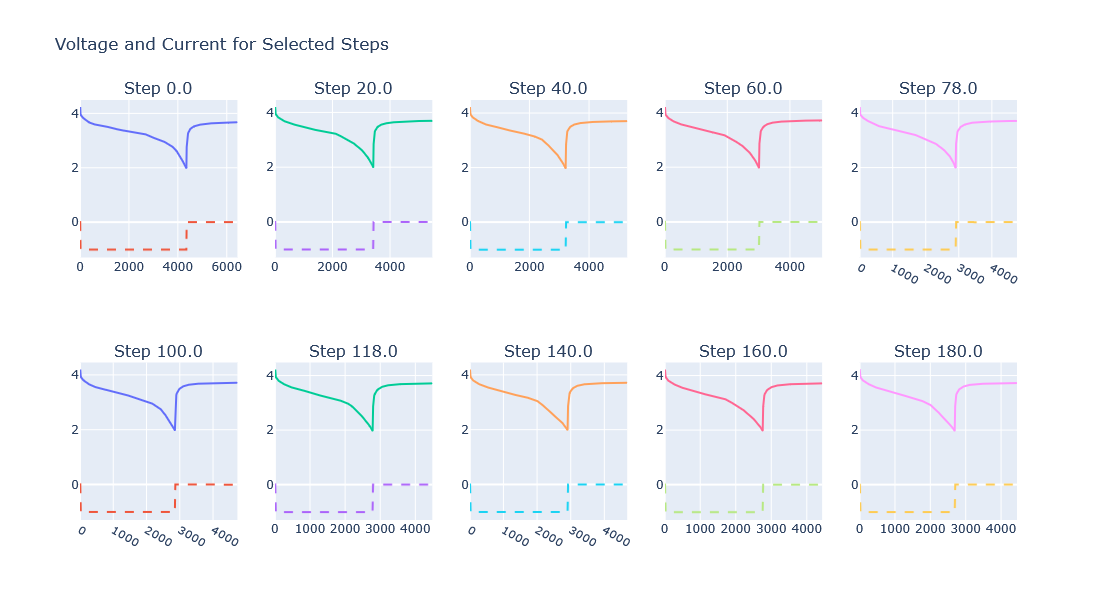

In [10]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 45] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles
if len(cycle_numbers) < 10:
    raise ValueError("Not enough unique cycles to select 10 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"Step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"Voltage - Step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"Capacity - Step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

<Axes: >

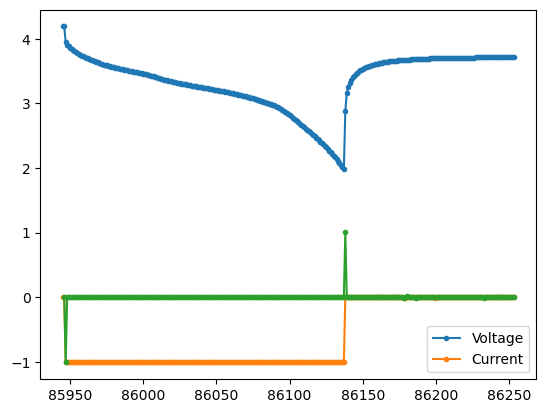

In [12]:
filtered_df[filtered_df['Step'] == 118][['Voltage', 'Current']].loc[10000:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 118]['Current'].diff().loc[10000:].plot(marker = ".")

In [13]:
# Define a function to filter data based on the difference in Current and Step_Time
def filter_after_zero_current(step_data):
    # Calculate the absolute difference in Current
    step_data['Current_Diff'] = step_data['Current'].diff(-1).abs()

    # Find the index where the Current_Diff is at least 2 and Step_Time is greater than 1000
    condition_idx = step_data[(step_data['Current_Diff'] >= 0.9) & (step_data['Step_Time'] > 1000)].index.min()

    if pd.notna(condition_idx):
        # Select rows after the condition index for this step
        return step_data.loc[condition_idx :].drop(columns='Current_Diff')  # Drop temporary column
    else:
        # If no condition is met, return an empty DataFrame for this step
        return pd.DataFrame(columns=step_data.columns)

#filter_after_zero_current(filtered_df[filtered_df['Step'] == 224])['Voltage'].plot(marker = ".")
# Apply this function to each 'Step' in the dataframe
# filtered_df = (
#     filtered_df.groupby('Step', group_keys=False)
#     .apply(filter_after_zero_current)
# )

# filtered_df.reset_index(drop=True, inplace=True)  # Optional: reset index

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\1729773715.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

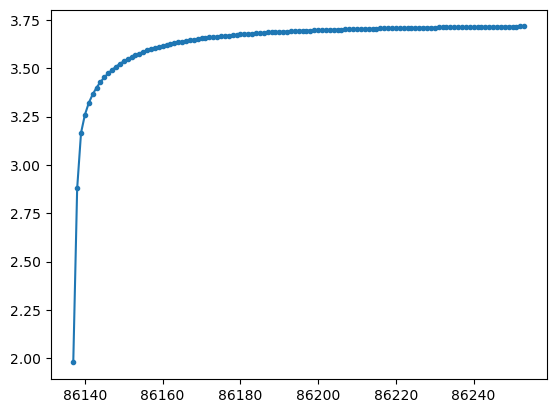

In [14]:
filter_after_zero_current(filtered_df[filtered_df['Step'] == 118])['Voltage'].plot(marker = ".")

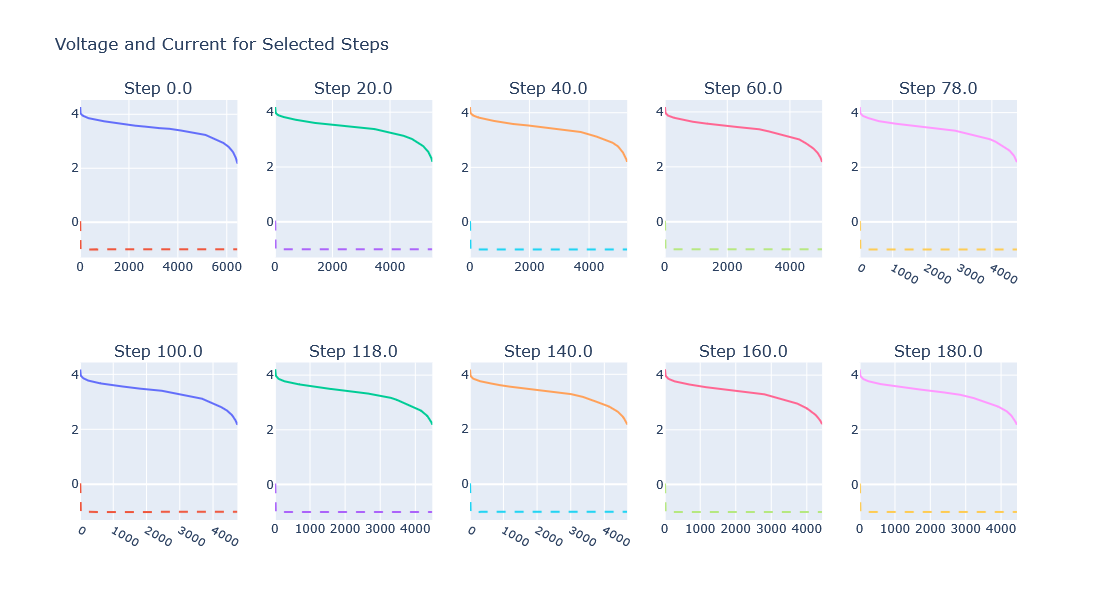

In [22]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 46] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles
if len(cycle_numbers) < 10:
    raise ValueError("Not enough unique cycles to select 10 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"Step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"Voltage - Step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"Capacity - Step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

<Axes: >

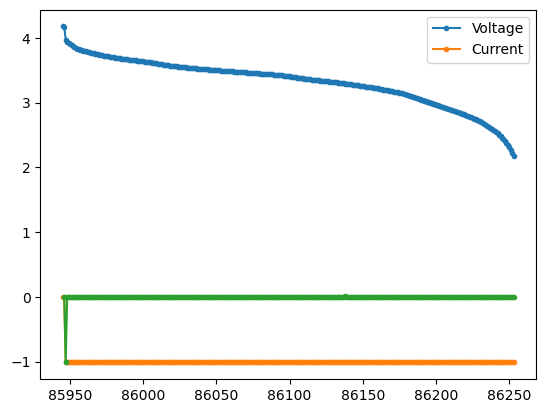

In [24]:
filtered_df[filtered_df['Step'] == 118][['Voltage', 'Current']].loc[10000:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 118]['Current'].diff().loc[10000:].plot(marker = ".")

In [25]:
filter_after_zero_current(filtered_df[filtered_df['Step'] == 118])['Voltage'].plot(marker = ".")

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\1729773715.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: no numeric data to plot

Because 46 does not experience VR.

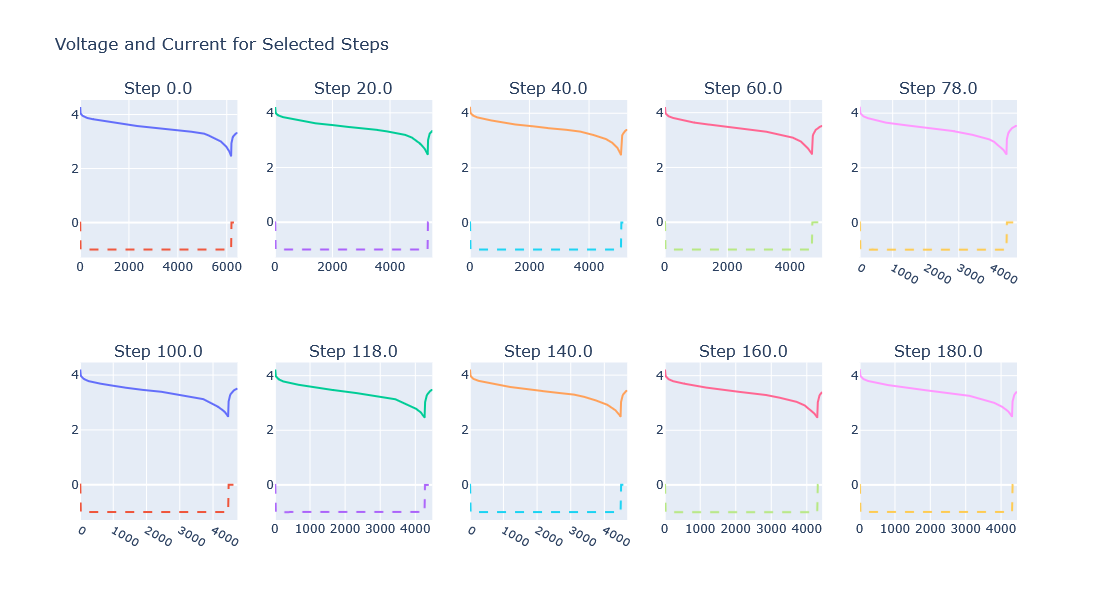

In [26]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 47] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles
if len(cycle_numbers) < 10:
    raise ValueError("Not enough unique cycles to select 10 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"Step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"Voltage - Step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"Capacity - Step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

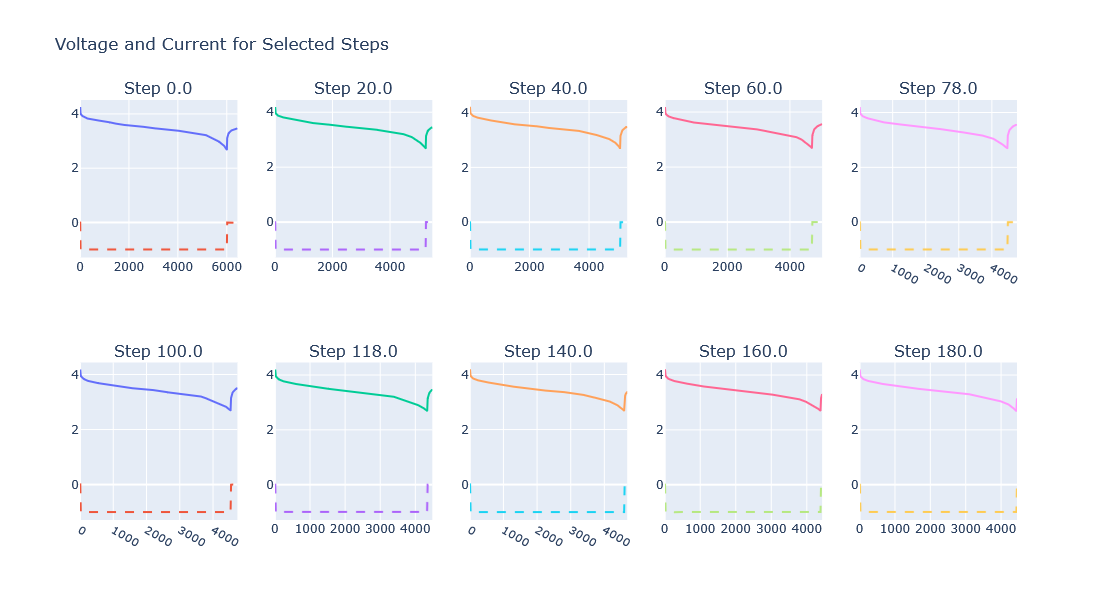

In [27]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 48] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles
if len(cycle_numbers) < 10:
    raise ValueError("Not enough unique cycles to select 10 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"Step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"Voltage - Step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"Capacity - Step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

<Axes: >

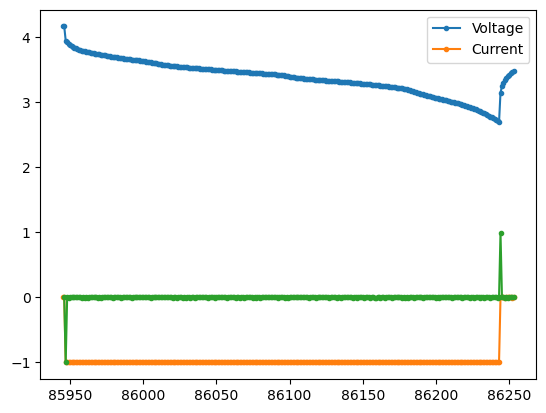

In [28]:
filtered_df[filtered_df['Step'] == 118][['Voltage', 'Current']].loc[10000:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 118]['Current'].diff().loc[10000:].plot(marker = ".")

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\1729773715.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

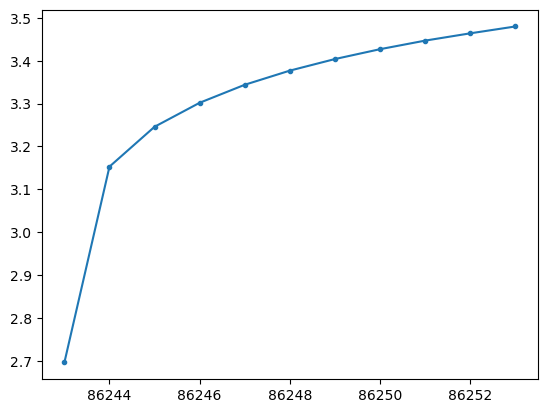

In [29]:
filter_after_zero_current(filtered_df[filtered_df['Step'] == 118])['Voltage'].plot(marker = ".")

In [30]:
nasa_45 = nasa[nasa['Cell'] == 45] 
nasa_46 = nasa[nasa['Cell'] == 46]
nasa_47 = nasa[nasa['Cell'] == 47]
nasa_48 = nasa[nasa['Cell'] == 48]

print(nasa_45.shape[0], nasa_46.shape[0], nasa_47.shape[0], nasa_48.shape[0])

24519 24519 24519 24519


In [31]:
# Apply this function to each 'Step' in the dataframe
nasa_45 = (
    nasa_45.groupby('Step', group_keys=False)
    .apply(filter_after_zero_current)
)

# Apply this function to each 'Step' in the dataframe
nasa_46 = (
    nasa_46.groupby('Step', group_keys=False)
    .apply(filter_after_zero_current)
)

# Apply this function to each 'Step' in the dataframe
nasa_47 = (
    nasa_47.groupby('Step', group_keys=False)
    .apply(filter_after_zero_current)
)

# Apply this function to each 'Step' in the dataframe
nasa_48 = (
    nasa_48.groupby('Step', group_keys=False)
    .apply(filter_after_zero_current)
)

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\3218217576.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\3218217576.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Worm\AppData\Local\Temp\ipykernel_26872\3218217576.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns wi

In [32]:
nasa_45['Voltage'].min(), nasa_46['Voltage'].min(), nasa_47['Voltage'].min(), nasa_48['Voltage'].min()

(1.964, nan, 2.465, 2.676)

In [34]:
nasa_df = pd.concat([nasa_45, nasa_47, nasa_48], axis = 0)
nasa_df.head()

Source Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
332   NASA       NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
333   NASA       NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
334   NASA       NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
335   NASA       NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
336   NASA       NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

     Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
332            4356.636               -4356.655              NaN   
333            4356.636               -4363.304              NaN   
334            4356.636               -4363.306              NaN   
335            4356.636               -4363.313              NaN   
336            4356.636               -4363.304              NaN   

     Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
332                 NaN       15.636                  4.0   -1.005   
333                 NaN       15.710                  4.0    0.000   
334                 NaN       15.659                  4.0   -0.001   
335                 NaN       15.495                  4.0   -0.001   
336                 NaN       15.199                  4.0    0.001   

    Charge_Type  Step_Time Current_Diff  
332  Continuous   4348.625          NaN  
333  Continuous   4361.860          NaN  
334  Continuous   4375.172          NaN  
335  Continuous   4388.438          NaN  
336  Continuous   4401.750          NaN

In [35]:
nasa_df['Step_Time'] = nasa_df.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())
nasa_df.head()

Source Chemistry  Cell  Cycle  Step Cycle_Type      Time  Voltage  \
332   NASA       NaN  45.0    0.0   0.0  discharge  4348.625    1.990   
333   NASA       NaN  45.0    0.0   0.0  discharge  4361.860    2.766   
334   NASA       NaN  45.0    0.0   0.0  discharge  4375.172    3.030   
335   NASA       NaN  45.0    0.0   0.0  discharge  4388.438    3.139   
336   NASA       NaN  45.0    0.0   0.0  discharge  4401.750    3.206   

     Reference Capacity  Instantaneous Capacity  Charge_Capacity  \
332            4356.636               -4356.655              NaN   
333            4356.636               -4363.304              NaN   
334            4356.636               -4363.306              NaN   
335            4356.636               -4363.313              NaN   
336            4356.636               -4363.304              NaN   

     Discharge_Capacity  Temperature  Ambient_Temperature  Current  \
332                 NaN       15.636                  4.0   -1.005   
333                 NaN       15.710                  4.0    0.000   
334                 NaN       15.659                  4.0   -0.001   
335                 NaN       15.495                  4.0   -0.001   
336                 NaN       15.199                  4.0    0.001   

    Charge_Type  Step_Time Current_Diff  
332  Continuous      0.000          NaN  
333  Continuous     13.235          NaN  
334  Continuous     26.547          NaN  
335  Continuous     39.813          NaN  
336  Continuous     53.125          NaN

In [36]:
# complete new
nasa_df.to_csv('C:/Users/Worm/Downloads/New_NASA_Rebound/nasa_rebound_data_NEW4548.csv')